<a href="https://colab.research.google.com/github/nalgo-intern/team-a-2025-summer-08-04/blob/main/MNIST_2%E6%A1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
from torchvision import datasets
from PIL import Image
from tqdm import tqdm

# 出力先
output_root = './two_digit_28x28'
os.makedirs(output_root, exist_ok=True)

# MNISTロード
mnist = datasets.MNIST(root='./mnist', train=True, download=True)
digit_images = {i: [] for i in range(10)}

# 数字ごとに分類
for img, label in mnist:
    digit_images[label].append(img)

# 2桁（00〜99）× 各100パターン
for tens in range(10):
    for ones in range(10):
        label = f"{tens}{ones}"
        save_dir = os.path.join(output_root, label)
        os.makedirs(save_dir, exist_ok=True)

        for i in range(100):
            # ランダムに2枚選ぶ
            left = random.choice(digit_images[tens])
            right = random.choice(digit_images[ones])

            # Pillow >=10.0 の対応（LANCZOSで高品質にリサイズ）
            left_resized = left.resize((14, 28), resample=Image.Resampling.LANCZOS)
            right_resized = right.resize((14, 28), resample=Image.Resampling.LANCZOS)

            # 28×28キャンバスに合成
            combined = Image.new('L', (28, 28), color=0)
            combined.paste(left_resized, (0, 0))
            combined.paste(right_resized, (14, 0))

            # 保存
            filename = f"{label}_{i:03}.png"
            combined.save(os.path.join(save_dir, filename))


100%|██████████| 9.91M/9.91M [00:00<00:00, 35.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.90MB/s]


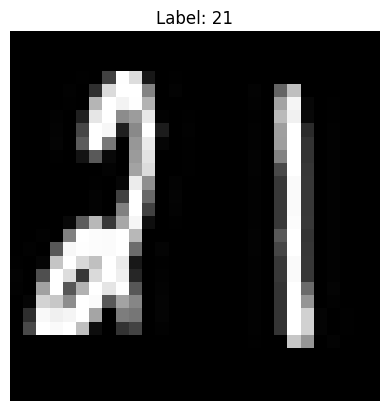

In [2]:
# 画像を確認する例
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./two_digit_28x28/21/21_001.png')
plt.imshow(img, cmap='gray')
plt.title("Label: 21")
plt.axis('off')
plt.show()

In [3]:
import shutil
shutil.make_archive('two_digit_28x28', 'zip', 'two_digit_28x28')

'/content/two_digit_28x28.zip'